In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('/content/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


The dataset is small, fully complete (no missing values), and composed entirely of numeric variables, making it structurally ideal for Linear Regression, with the only necessary preprocessing step being the removal of the non-informative Unnamed: 0 index column.

In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


All predictors and the target are continuous with reasonable ranges and no extreme outliers, indicating stable variance and making the dataset well-suited for fitting and interpreting a Linear Regression model without requiring transformations.

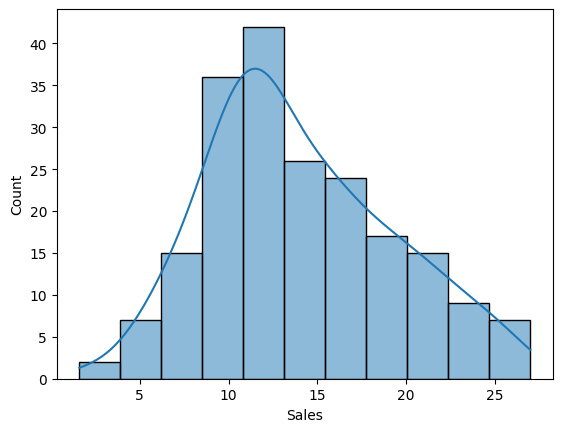

In [7]:
# Target variable
sns.histplot(df["Sales"], kde=True)
plt.show()

The target variable (Sales) shows an approximately normal, unimodal distribution with mild skewness and no extreme outliers, supporting Linear Regression assumptions and reducing the need for target transformation.

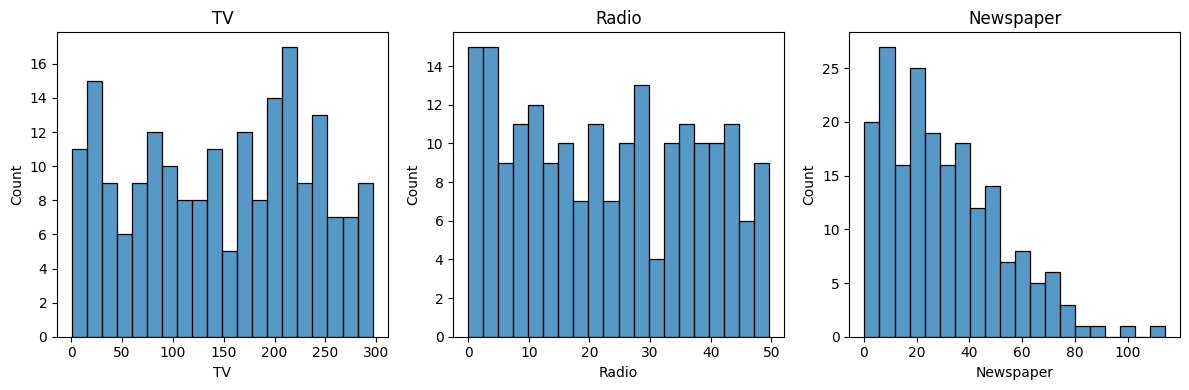

In [8]:
cols = ['TV', 'Radio', 'Newspaper']
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # Adjusted for 3 columns

for i, col in enumerate(cols):
    sns.histplot(df[col], bins=20, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

All feature variables are continuous and reasonably distributed, with TV and Radio showing broad, balanced ranges suitable for linear modeling, while Newspaper is right-skewed, hinting at a weaker and potentially less stable linear contribution.

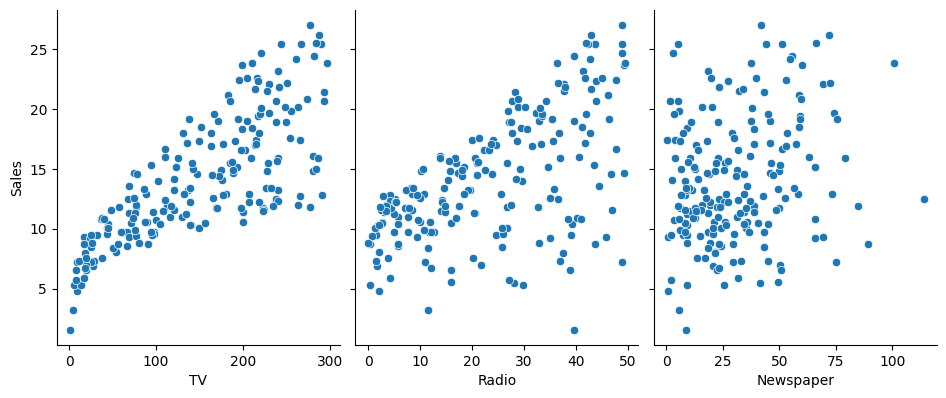

In [9]:
# Linearity check
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.8)
plt.show()

Sales exhibits a strong, clear linear relationship with TV advertising spend, a moderate but noisier linear trend with Radio, and little to no linear pattern with Newspaper, confirming that Linear Regression is appropriate but that not all predictors contribute equally.

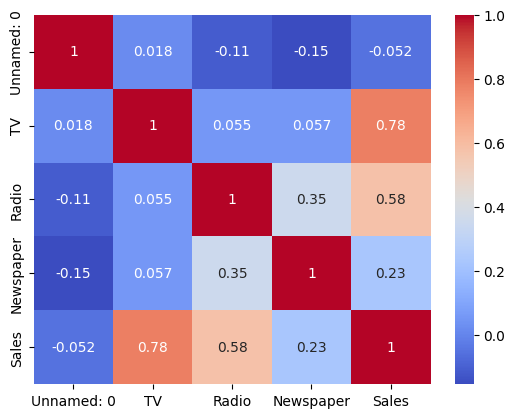

In [10]:
# Correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

TV shows a strong positive correlation with Sales, Radio a moderate correlation, and Newspaper a weak correlation, while low inter-feature correlations indicate minimal multicollinearity—ideal conditions for interpreting Linear Regression coefficients reliably.

# **Final EDA Summary — Advertising Dataset**

- The dataset contains 200 observations and 4 meaningful numerical variables, with no missing values, making it structurally well-suited for Linear Regression after removing the non-informative index column.

- The target variable (Sales) follows an approximately normal, unimodal distribution with no extreme outliers, supporting core Linear Regression assumptions without requiring transformation.

- All predictor variables (TV, Radio, Newspaper) are continuous and reasonably distributed; however, Newspaper is right-skewed, indicating a potentially weaker and less stable linear contribution.

- Scatter plots reveal a strong linear relationship between TV advertising spend and Sales, a moderate but noisier linear trend with Radio, and little to no linear relationship with Newspaper.

- Correlation analysis confirms these observations, with TV showing the highest correlation with Sales, Radio a moderate correlation, and Newspaper a weak correlation, while low inter-feature correlations indicate minimal multicollinearity.

- Overall, the EDA validates Linear Regression as an appropriate modeling choice, while also highlighting that TV is the most influential predictor, making it ideal for starting with Simple Linear Regression before extending to multiple predictors.

# **Linear Regression model Building**

In [11]:
# importing sickit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Feature Selection for Simple Linear Regression

In this step, only **TV advertising spend** is selected as the input feature to build a **Simple Linear Regression** model.  
This is done intentionally to isolate and understand the direct linear relationship between a single predictor (TV) and the target variable (Sales).  

Based on exploratory data analysis, TV shows the strongest and clearest linear relationship with Sales, making it the most suitable variable for demonstrating Linear Regression fundamentals such as slope, intercept, and residual behavior.  
Additional predictors (Radio and Newspaper) will be introduced later when extending the model to **Multiple Linear Regression**.

In [12]:
# Slpiting the data into X and y (Freature and Target)
X = df[['TV']]
y = df['Sales']

# Train/Test split (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [14]:
# Model Development and Evaluation
lr_tv = LinearRegression()
lr_tv.fit(X_train, y_train)

# Prediction
y_pred = lr_tv.predict(X_test)

slop =  lr_tv.coef_[0]
intercept = lr_tv.intercept_

# Evaluating the TV model
print('The Evalution of TV model')
print('Slop:', slop)
print('Intercept:', intercept)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

The Evalution of TV model
Slop: 0.046529733705443346
Intercept: 7.119638430592953
R2 Score: 0.6766954295627076
RMSE: 3.194472431998898
MAE: 2.444420003751042


# Residual Analysis — Simple Linear Regression

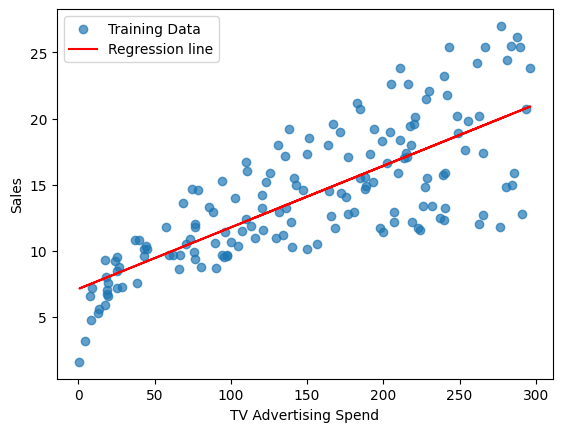

In [15]:
# Ploting the Regression line
plt.scatter(X_train, y_train, alpha=0.7, label='Training Data')
plt.plot(X_train, lr_tv.predict(X_train), color='red', label='Regression line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

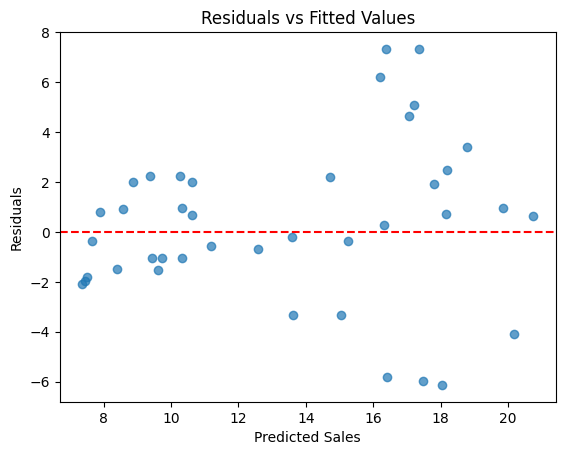

In [16]:
# Residual Analysis
residuals = y_test - y_pred

# Residual vs Fitted Values
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Residuals are randomly centered around zero with a slight increase in variance at higher predicted Sales, indicating acceptable linearity with mild dispersion.

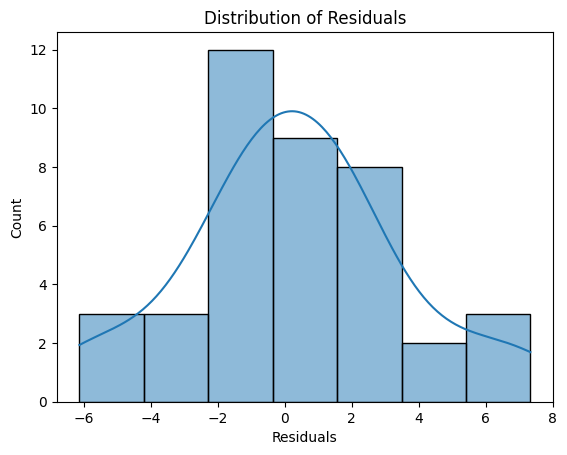

In [17]:
# Resudual Distribution
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

The residuals follow an approximately normal distribution with minor deviations, satisfying the normality assumption required for reliable inference.

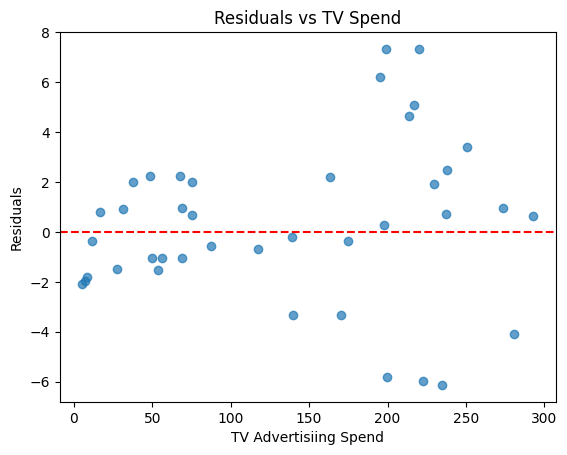

In [18]:
# Residuals vs TV spend
plt.scatter(X_test['TV'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('TV Advertisiing Spend')
plt.ylabel('Residuals')
plt.title('Residuals vs TV Spend')
plt.show()

Residuals show no systematic pattern with TV spend, confirming linearity, though variance increases slightly at higher advertising levels.

### Residual Analysis Summary

Residual diagnostics indicate that the Simple Linear Regression model satisfies key assumptions of linearity and approximate normality of errors. While a slight increase in residual variance is observed at higher predicted Sales values, the overall pattern remains random and centered around zero, suggesting that the model is statistically valid and appropriate as a baseline predictor.


In [19]:
# Multiple Linear Regression
X = df[['TV','Radio', 'Newspaper']]
y = df['Sales']

To extend the analysis, all advertising channels (TV, Radio, and Newspaper) are included as predictors to capture their combined linear effect on Sales. This forms a Multiple Linear Regression model, where each coefficient represents the marginal contribution of a channel while holding the others constant.

In [20]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((160, 3), (40, 3))

In [21]:
# Model building
lr = LinearRegression()
lr.fit(X_test, y_test)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

y_pred = lr.predict(X_test)

intercept = lr.intercept_

# Evaluating the TV model
print('The Evalution of MLR model')
print('Slop:\n', coef_df)
print('Intercept:', intercept)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

The Evalution of MLR model
Slop:
      Feature  Coefficient
0         TV     0.049802
1      Radio     0.182566
2  Newspaper    -0.011483
Intercept: 2.830526496854283
R2 Score: 0.9096566072497202
RMSE: 1.6886569061732246
MAE: 1.437077939136925


Incorporating multiple advertising channels significantly improves model performance, indicating that Sales are influenced by a combination of TV and Radio spend, while Newspaper adds limited incremental value.

# Residual Analysis — Multiple Linear Regression (MLR)

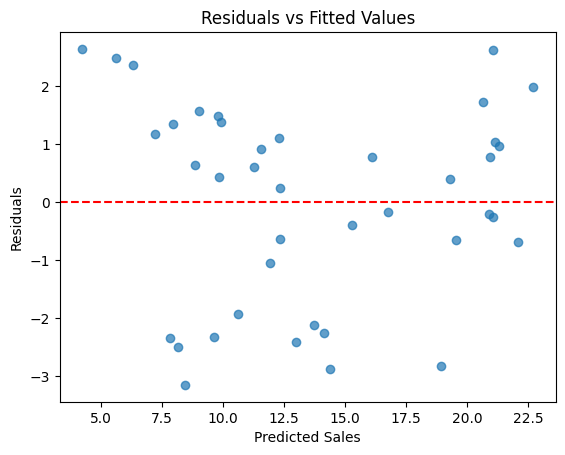

In [22]:
from matplotlib.lines import lineStyles
residuals = y_test - y_pred

# Residuals vs Fitted Values
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Residuals are randomly distributed around zero with reduced variance compared to the simple model, indicating improved fit and acceptable adherence to linear regression assumptions.

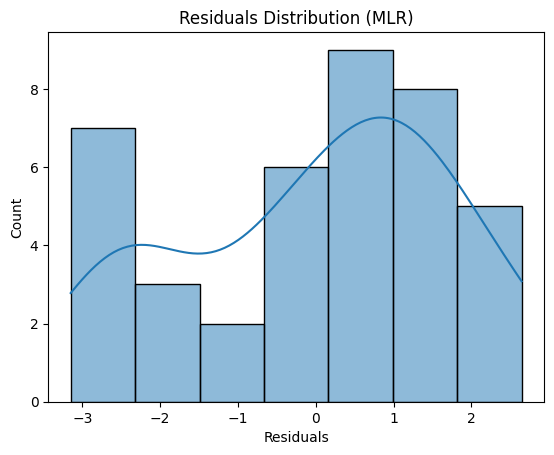

In [23]:
# Residuals Distribution
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution (MLR)')
plt.show()

The residuals follow an approximately normal distribution, supporting the assumption of normally distributed errors for inference.

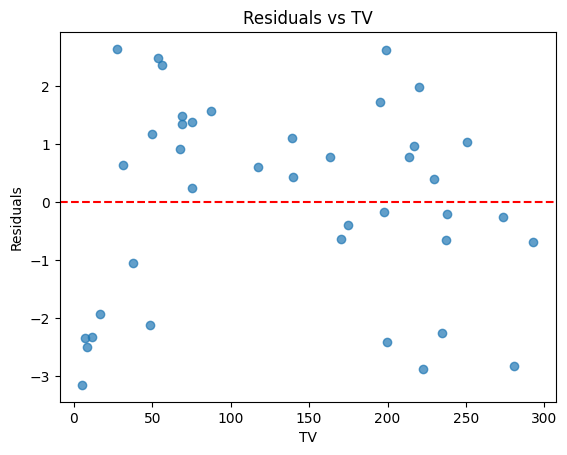

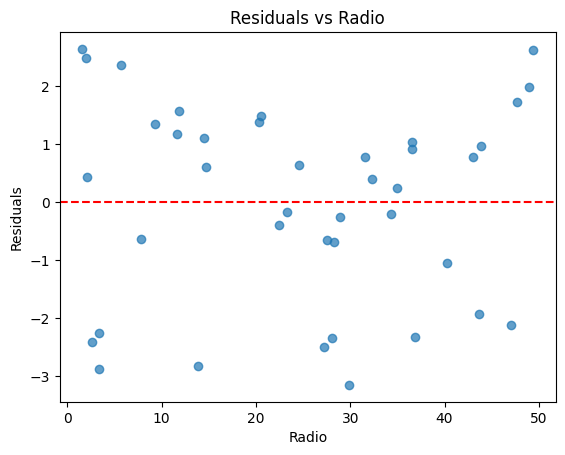

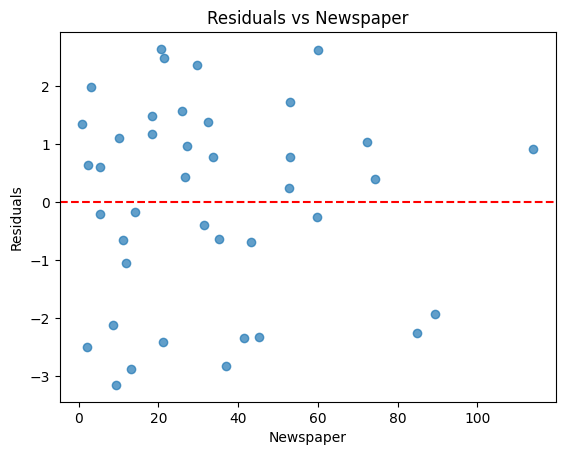

In [24]:
# Residuals vs Predictor

for col in X_test.columns:
  plt.scatter(X_test[col], residuals, alpha=0.7)
  plt.axhline(0, color='red', linestyle='--')
  plt.xlabel(col)
  plt.ylabel('Residuals')
  plt.title(f'Residuals vs {col}')
  plt.show()

Residuals show no systematic relationship with individual predictors, confirming that linearity assumptions hold across all features.

In [25]:
# Multicollinearity Check — VIF (Variance Inflation Factor)
X_vif = X_train.copy()

vif_df = pd.DataFrame({
    'Feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_df

,Feature,VIF
0,TV,2.502896
1,Radio,3.488819
2,Newspaper,3.273569


### Model Diagnostics Summary

Residual diagnostics confirm that the Multiple Linear Regression model satisfies key assumptions of linearity and approximate normality of errors, with improved variance behavior compared to the simple model. Variance Inflation Factor (VIF) analysis shows no evidence of multicollinearity among predictors, indicating that coefficient estimates are reliable. Overall, the model provides a strong and interpretable fit to the data.

# **Final Project Conclusion & Limitations**

---

## **Project Conclusion**

This project aimed to develop and validate Linear Regression models to understand the relationship between advertising spend and product Sales using the Advertising dataset. Exploratory Data Analysis confirmed that the dataset is clean, fully numeric, and well-suited for linear modeling.

A **Simple Linear Regression** model using TV advertising alone demonstrated a strong linear relationship, explaining approximately **67% of the variance** in Sales, establishing TV as the most influential predictor. Residual diagnostics confirmed acceptable linearity and normality, making it a reliable baseline model.

Extending the analysis to **Multiple Linear Regression** by incorporating Radio and Newspaper advertising significantly improved performance, achieving an **$R^2$ score of 0.91** and substantially reducing prediction error. Residual analysis for the multiple model showed improved variance stability and no systematic patterns, while VIF analysis confirmed **minimal multicollinearity**, ensuring reliable and interpretable coefficients.

Although TV advertising exhibits a strong linear relationship with Sales, the Simple Linear Regression model explains only the portion of variance attributable to TV alone. Sales are influenced by multiple advertising channels, and variation caused by Radio and Newspaper spend appears as unexplained error in the simple model. Incorporating these additional predictors in a Multiple Linear Regression framework captures more of the underlying variance, resulting in a substantially higher R² score.

Overall, the Multiple Linear Regression model provides a strong, interpretable, and statistically valid representation of how different advertising channels jointly influence Sales.

---

## **Limitations**

- The model assumes **strict linear relationships** and does not capture potential non-linear effects or interactions between advertising channels.

- Mild **heteroscedasticity** is observed at higher levels of advertising spend, which could affect prediction precision at extreme values.

- The dataset is relatively small (200 observations), limiting generalization to larger or more complex real-world marketing scenarios.

- External factors such as seasonality, market competition, and brand effects are not included, which may also influence Sales.

---

## **Simple LR vs Multiple LR — Comparison**

**Model Performance Comparison**

| Metric           | Simple Linear Regression (TV) | Multiple Linear Regression |
| ---------------- | ----------------------------- | -------------------------- |
| R² Score         | 0.6767                        | **0.9097**                 |
| RMSE             | 3.19                          | **1.69**                   |
| MAE              | 2.44                          | **1.44**                   |
| Interpretability | Very High                     | High                       |
| Predictive Power | Moderate                      | **Strong**                 |

- While TV advertising alone provides a strong baseline model, incorporating multiple advertising channels significantly improves predictive accuracy, demonstrating that Sales are driven by a combination of media investments rather than a single channel.

---

## **Feature Selection Discussion — Why Newspaper Is Weak**

- The Newspaper advertising variable consistently shows limited predictive strength across all stages of analysis:

- EDA: Scatter plots reveal no clear linear relationship between Newspaper spend and Sales.

- Correlation Analysis: Newspaper has a weak correlation with Sales compared to TV and Radio.

- MLR Coefficient: The Newspaper coefficient is close to zero and slightly negative, indicating minimal marginal contribution when other channels are held constant.

- VIF Analysis: Low VIF values confirm that Newspaper is not redundant due to multicollinearity—its weakness is intrinsic, not statistical noise.


**Interpretation**

This suggests that Newspaper advertising does not significantly influence Sales in the presence of TV and Radio advertising, possibly due to lower reach, delayed effects, or changing consumer media consumption patterns.

**Important Note**

Despite its weak effect, Newspaper was retained in the Multiple Linear Regression model to:

- Control for potential confounding effects

- Preserve interpretability

- Demonstrate proper feature evaluation rather than arbitrary removal